In [1]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set panads rows and col to none
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# read data
df = pd.read_csv('/home/sam/Desktop/Codes/DataScience/datasets/song_data.csv')

# print data
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
# print shape of data
df.shape

(18835, 15)

In [4]:
# check null values
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [5]:
# check data types
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [6]:
# drop 'song name' unnecessary column
df.drop('song_name', axis=1, inplace = True)

<AxesSubplot:xlabel='song_popularity', ylabel='song_duration_ms'>

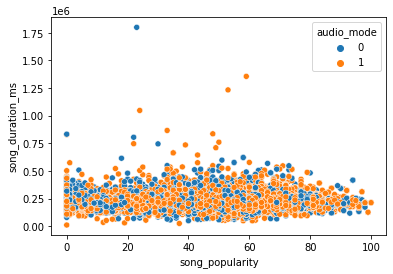

In [7]:
# lets print data
sns.scatterplot(x= df['song_popularity'], y =df['song_duration_ms'],hue=df['audio_mode'])

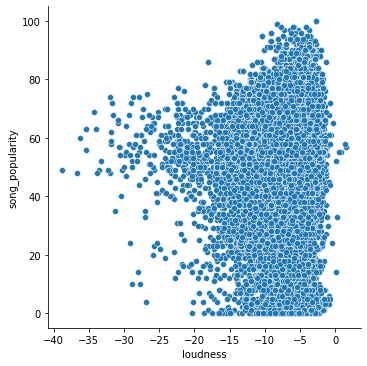

In [8]:
sns.relplot(x= df['loudness'], y =df['song_popularity'])

<AxesSubplot:xlabel='song_popularity', ylabel='song_duration_ms'>

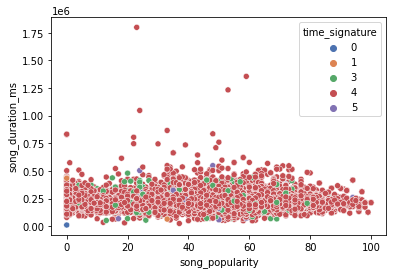

In [9]:
sns.scatterplot(x= df['song_popularity'], y =df['song_duration_ms'],hue=df['time_signature'], palette='deep')

/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='audio_mode', ylabel='count'>

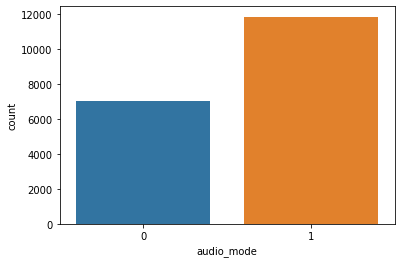

In [10]:
sns.countplot(df['audio_mode'])

/home/sam/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='time_signature', ylabel='count'>

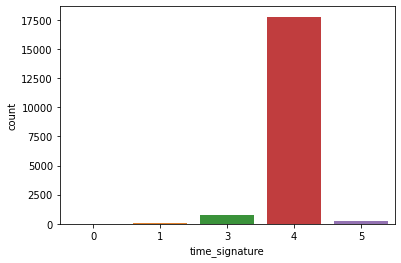

In [11]:
sns.countplot(df['time_signature'])

<AxesSubplot:>

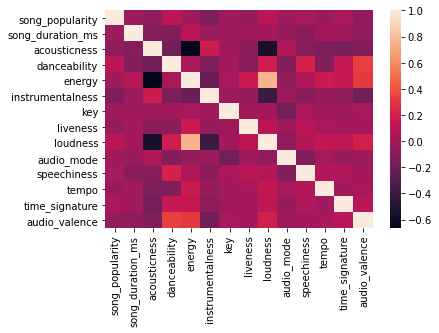

In [12]:
corr =  df.corr()
sns.heatmap(corr, annot=False)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df= pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [14]:
x = df.iloc[:,1:]
y = df['song_popularity']
x.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.736757,-0.876374,-0.876400,0.172845,-0.351913,0.749981,-0.838658,0.875829,0.769418,-0.696514,1.601565,0.136944,-0.220610
1,-0.021350,-0.859818,-0.582880,0.971555,-0.352046,-0.633337,-0.497639,0.271815,-1.299684,-0.501066,-0.550858,0.136944,-0.645751
2,0.225786,-0.867195,0.661389,-0.850065,1.665241,-1.463328,0.523333,-0.099423,0.769418,-0.219391,0.097788,0.136944,-0.833793
3,-0.021350,-0.804053,-1.163539,1.518042,-0.336025,-1.463328,-0.539312,0.655594,0.769418,0.046954,0.047742,0.136944,-1.348867
4,0.093752,-0.892189,-1.189062,0.565194,-0.352046,1.303308,-0.462913,0.622415,0.769418,-0.678310,1.773991,0.136944,0.188178


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [26]:
from sklearn.metrics import r2_score
score = r2_score(pred, y_test)
score

-22.591848293674172